# Week 5 Notebook - Multilayered Perceptrons

Create a new Jupyter notebook. Using the code in the bottom of the Week 4 notebook, import the notMNIST dataset and create a training/testing split of the data. 

Train a neural network on the dataset using Keras. Experiment with both sigmoid and ReLU activations, different numbers of neurons in each layer, and different regularization settings. (Only use dense layer for this assignment.) 

Plot the loss of the network (using 'categorical_crossentropy').

Keep your best result. Save the notebook as pdf and turn it in, a zipped html is also fine in case you are unable to save as pdf.


In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.model_selection import train_test_split

np.random.seed = 47

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape
print X_train_scaled.shape

(160L, 1L)
(160L,)
(40L, 1L)
(40L,)
(160L, 1L)


In [7]:
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [3]:
# Implement your code here
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model 
model.add(Dense(output_dim=2, input_shape=[X_train_scaled.shape[1]], 
                activation='sigmoid'))
model.add(Dense(output_dim=1, activation='linear'))

# Slightly better model.
# model.add(Dense(output_dim=4, input_shape=[X_train_scaled.shape[1]], 
#                 activation='relu'))
# model.add(Dense(output_dim=2, activation='sigmoid'))
# model.add(Dense(output_dim=1, activation='linear'))


# Compile model
sgd = SGD(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)

Using Theano backend.
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2, activation="sigmoid", input_shape=[1L])`
  if sys.path[0] == '':
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="linear")`
  del sys.path[0]


In [4]:
model.summary()

# Fit the model
history = model.fit(X_train_scaled, y_train.reshape(-1,1), batch_size = 256,
          nb_epoch = 10000, verbose=0, validation_data=(X_test_scaled,y_test.reshape(-1,1)))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


RMSE Loss after final iteration:  3.4179898157832973


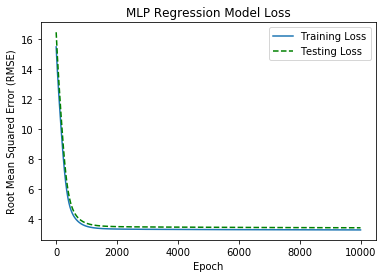

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']), 'g--')
plt.title('MLP Regression Model Loss')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "RMSE Loss after final iteration: ", np.sqrt(history.history['val_loss'][-1])
plt.show()

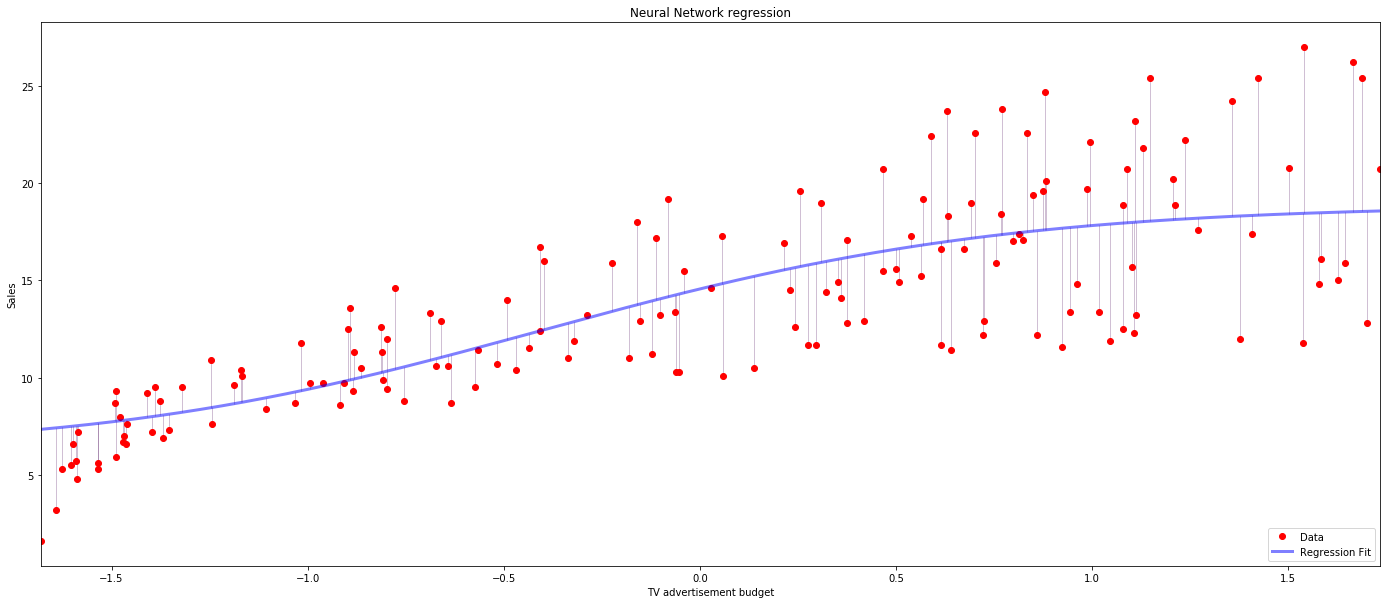

In [9]:
from matplotlib.collections import LineCollection

y_predicted = model.predict(X_train_scaled)
N = len(y_train)

segments = [[[X_train_scaled[i], y_train[i]], [X_train_scaled[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# plot the training data
plt.plot(X_train_scaled, y_train, 'r.', markersize=12)
# plot the prediction line
x_lin = np.linspace(X_train_scaled.min(),X_train_scaled.max(),1000).reshape(-1,1)
plt.plot(x_lin, model.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# plot the redisuals
plt.gca().add_collection(lc)

plt.xlim([X_train_scaled.min(),X_train_scaled.max()])
plt.xlabel('TV advertisement budget')
plt.ylabel('Sales')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Neural Network regression')

# plot the regression line
plt.show()

### KDD Cup 1999 Network Security Dataset

In this next example, we will look at the KDD Cup 1999 dataset. (10% subset)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
print("Targets: ", data['target'].unique())
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

data.head()

('Shape: ', (494021, 42))
('Targets: ', array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object))


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.00
1,0,tcp,private,S0,0,0,0,0,0,0,...,255,5,0.02,0.06,0.0,0.0,1.0,1.0,0.00,0.00
2,0,tcp,http,SF,54540,8314,0,0,0,2,...,220,220,1.00,0.00,0.0,0.0,0.0,0.0,0.01,0.01
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.00
4,0,tcp,sql_net,S0,0,0,0,0,0,0,...,255,14,0.05,0.05,0.0,0.0,1.0,1.0,0.00,0.00


In [12]:
discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)
data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.00
1,0,1,0,0,0,0,0,0,0,0,...,255,5,0.02,0.06,0.0,0.0,1.0,1.0,0.00,0.00
2,0,1,0,0,0,0,0,0,0,0,...,220,220,1.00,0.00,0.0,0.0,0.0,0.0,0.01,0.01
3,1,0,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.0,0.0,0.0,0.0,0.00,0.00
4,0,1,0,0,0,0,0,0,0,0,...,255,14,0.05,0.05,0.0,0.0,1.0,1.0,0.00,0.00


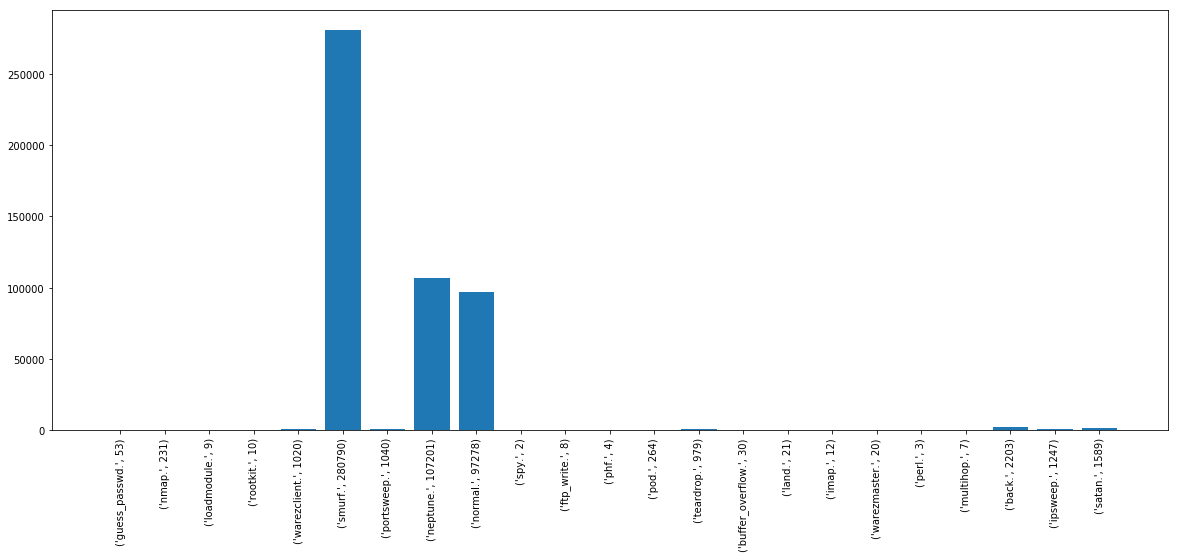

In [13]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(20,8))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [14]:
targetDummies = pd.get_dummies(target)
targetFull = targetDummies
targetFull.head()

,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,...,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
target[target != 'normal.'] = 1.0
target[target == 'normal.'] = 0.0
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: object

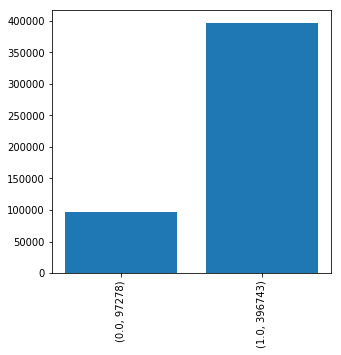

In [16]:
posteriorCount = {i:(target==i).sum() for i in target.unique()}
fig = plt.figure(figsize=(5,5))
plt.bar(range(len(posteriorCount)), posteriorCount.values(), align='center')
plt.xticks(range(len(posteriorCount)), zip(posteriorCount.keys(),posteriorCount.values()), rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [17]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(247010, 118)
(247010L,)
(247011, 118)
(247011L,)


In [18]:
# standardize the data
# turn off the error message, we're not setting indivdual values.
pd.options.mode.chained_assignment = None

toStandardize = ['src_bytes', 'dst_bytes', 'count', 'srv_count',
                 'dst_host_count', 'dst_host_srv_count']
stdscaler = preprocessing.MinMaxScaler().fit(X_train[toStandardize])
X_train[toStandardize] = stdscaler.transform(X_train[toStandardize])
X_test[toStandardize]  = stdscaler.transform(X_test[toStandardize])

X_train.head()

C:\Users\m\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.007843,1.000000,1.00,0.00,0.5,0.02,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,1.00,0.00,1.0,0.00,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,1.000000,0.007843,0.01,0.06,0.0,0.00,1.0,1.0,0.0,0.0


### Logistic Regression Model on the KDD Cup 1999 dataset

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(output_dim=1, input_shape=[X_train.shape[1]], 
                activation='sigmoid', W_regularizer=l2(0.001)))

# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[118], kernel_regularizer=<keras.reg..., units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 119       
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Fit the model
history = model.fit(X_train.as_matrix(), y_train.as_matrix().reshape(-1,1), batch_size = 256,
          nb_epoch = 15, verbose=2, validation_data=(X_test.as_matrix(),y_test.as_matrix().reshape(-1,1)))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 247010 samples, validate on 247011 samples
Epoch 1/15
 - 3s - loss: 0.1042 - val_loss: 0.0692
Epoch 2/15
 - 3s - loss: 0.0649 - val_loss: 0.0650
Epoch 3/15
 - 4s - loss: 0.0626 - val_loss: 0.0635
Epoch 4/15
 - 3s - loss: 0.0616 - val_loss: 0.0629
Epoch 5/15
 - 3s - loss: 0.0611 - val_loss: 0.0626
Epoch 6/15
 - 3s - loss: 0.0608 - val_loss: 0.0624
Epoch 7/15
 - 3s - loss: 0.0607 - val_loss: 0.0622
Epoch 8/15
 - 3s - loss: 0.0606 - val_loss: 0.0621
Epoch 9/15
 - 3s - loss: 0.0605 - val_loss: 0.0621
Epoch 10/15
 - 3s - loss: 0.0605 - val_loss: 0.0621
Epoch 11/15
 - 3s - loss: 0.0605 - val_loss: 0.0620
Epoch 12/15
 - 3s - loss: 0.0604 - val_loss: 0.0623
Epoch 13/15
 - 3s - loss: 0.0604 - val_loss: 0.0621
Epoch 14/15
 - 3s - loss: 0.0604 - val_loss: 0.0621
Epoch 15/15
 - 3s - loss: 0.0604 - val_loss: 0.0621


Loss after final iteration:  0.062137007140191644


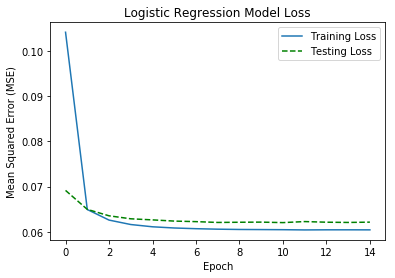

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [23]:
predictions = pd.DataFrame(model.predict(X_test.as_matrix()))
predictions[predictions > 0.5] = 'normal'
predictions[predictions <= 0.5] = 'anamoly'

y_test_labels = y_test.as_matrix().reshape(-1,1).copy()
y_test_labels[y_test_labels > 0.5] = 'normal'
y_test_labels[y_test_labels <= 0.5] = 'anamoly'

print 'accuracy', accuracy_score(predictions,y_test_labels)
print 'confusion matrix\n', confusion_matrix(predictions,y_test_labels)

print classification_report(predictions,y_test_labels)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


accuracy 0.9905550764945691
confusion matrix
[[ 47997   1638]
 [   695 196681]]
              precision    recall  f1-score   support

     anamoly       0.99      0.97      0.98     49635
      normal       0.99      1.00      0.99    197376

   micro avg       0.99      0.99      0.99    247011
   macro avg       0.99      0.98      0.99    247011
weighted avg       0.99      0.99      0.99    247011



### MLP Model on the KDD Cup 1999 dataset

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# Model
model.add(Dense(output_dim=4, input_shape=[X_train.shape[1]], 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=2, 
                activation='relu', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=1,
                activation='sigmoid', W_regularizer=l2(0.001)))
# Compile model
sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=[118], kernel_regularizer=<keras.reg..., units=4)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2, activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app


In [25]:
# Fit the model
history = model.fit(X_train.as_matrix(), y_train.as_matrix().reshape(-1,1), batch_size = 256,
          nb_epoch = 15, verbose=2, validation_data=(X_test.as_matrix(),y_test.as_matrix().reshape(-1,1)))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 247010 samples, validate on 247011 samples
Epoch 1/15
 - 4s - loss: 0.0867 - val_loss: 0.0443
Epoch 2/15
 - 4s - loss: 0.0506 - val_loss: 0.0480
Epoch 3/15
 - 4s - loss: 0.0429 - val_loss: 0.0401
Epoch 4/15
 - 5s - loss: 0.0374 - val_loss: 0.0360
Epoch 5/15
 - 4s - loss: 0.0338 - val_loss: 0.0331
Epoch 6/15
 - 4s - loss: 0.0312 - val_loss: 0.0310
Epoch 7/15
 - 4s - loss: 0.0295 - val_loss: 0.0296
Epoch 8/15
 - 4s - loss: 0.0283 - val_loss: 0.0287
Epoch 9/15
 - 5s - loss: 0.0274 - val_loss: 0.0279
Epoch 10/15
 - 5s - loss: 0.0267 - val_loss: 0.0273
Epoch 11/15
 - 4s - loss: 0.0282 - val_loss: 0.0425
Epoch 12/15
 - 4s - loss: 0.0388 - val_loss: 0.0373
Epoch 13/15
 - 4s - loss: 0.0344 - val_loss: 0.0335
Epoch 14/15
 - 4s - loss: 0.0314 - val_loss: 0.0310
Epoch 15/15
 - 4s - loss: 0.0294 - val_loss: 0.0294


Loss after final iteration:  0.0294217645587069


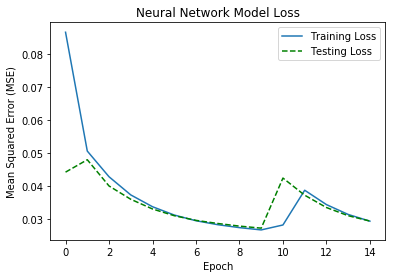

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Neural Network Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [27]:
predictions = pd.DataFrame(model.predict(X_test.as_matrix()))
predictions[predictions > 0.5] = 'normal'
predictions[predictions <= 0.5] = 'anamoly'

y_test_labels = y_test.as_matrix().reshape(-1,1)
y_test_labels[y_test_labels > 0.5] = 'normal'
y_test_labels[y_test_labels <= 0.5] = 'anamoly'

print 'accuracy', accuracy_score(predictions,y_test_labels)
print 'confusion matrix\n', confusion_matrix(predictions,y_test_labels)

print classification_report(predictions,y_test_labels)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


accuracy 0.9962916631243143
confusion matrix
[[ 48336    560]
 [   356 197759]]
              precision    recall  f1-score   support

     anamoly       0.99      0.99      0.99     48896
      normal       1.00      1.00      1.00    198115

   micro avg       1.00      1.00      1.00    247011
   macro avg       0.99      0.99      0.99    247011
weighted avg       1.00      1.00      1.00    247011

